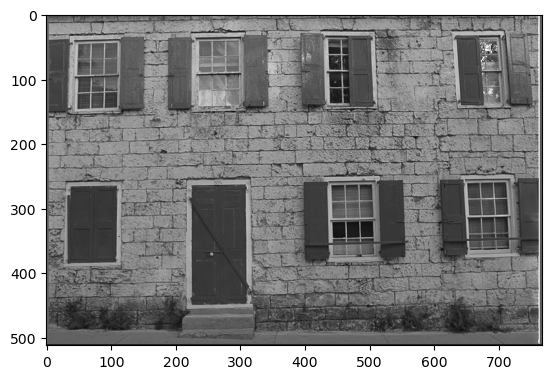

In [1]:
import matplotlib.pyplot as plt
import numpy as np

img_path = '../boxcox/img/1.png'
img = plt.imread(img_path)
bw_img = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]
plt.imshow(bw_img, cmap='gray')

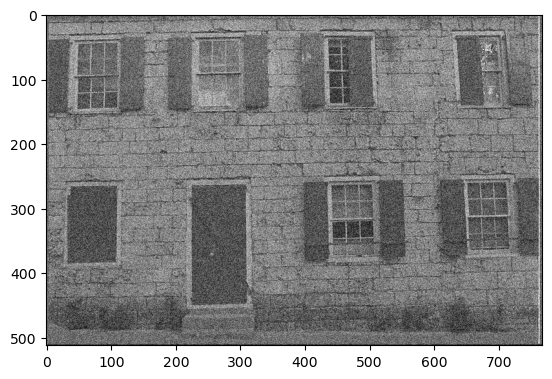

In [2]:
bw_img_noise = bw_img + 0.5 * np.random.random(bw_img.shape)
plt.imshow(bw_img_noise, cmap='gray')

# Flatten

In [3]:
x = bw_img_noise.flatten()
y = bw_img.flatten()

In [4]:
from scipy.spatial import distance
import dcor
print(distance.correlation(x, y))
print(dcor.distance_covariance(x, y))

0.26381495727502013


/home/fcastellano/.conda/envs/memoria/lib/python3.10/site-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float64, 1d, C), array(float32, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


0.08558621946554548


In [19]:
(np.ones((3,3))/9).shape

(3, 3)

In [18]:
bw_img_noise.shape

(512, 768)

# reduce img size by averaging

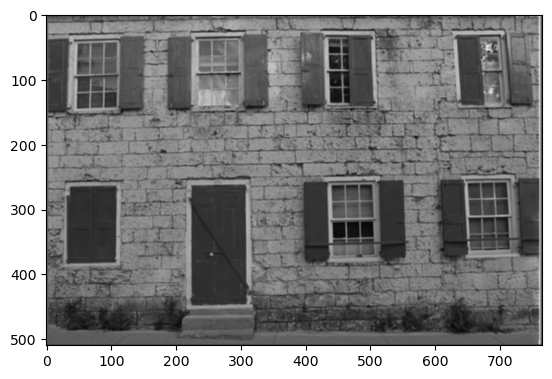

In [31]:
# reduce image size then flatten
from scipy.signal import convolve2d
win_size = 3
mean_matrix = np.ones((win_size,win_size))/win_size**2
blur_img = convolve2d(bw_img, mean_matrix, mode='valid')
plt.imshow(blur_img, cmap='gray')

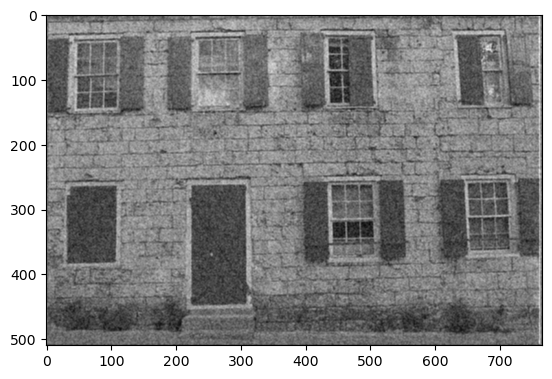

In [32]:
blur_img = convolve2d(bw_img_noise, mean_matrix, mode='valid')
plt.imshow(blur_img, cmap='gray')

In [33]:

x = convolve2d(bw_img_noise, mean_matrix, mode='valid').flatten()
y = convolve2d(bw_img, mean_matrix, mode='valid').flatten()
print(distance.correlation(x, y))

0.055311350753292854
